# Finding the Scaling Relations 

* All the expressions are symbolically evaluated in the [model_generator.py](https://github.com/Rnazx/Scaling-Relations/blob/master/model_generator.py) file using the model_gen_regime function.

* The following are the steps needed to find the scaling relations. The instructions below are given in the order of the blocks of code.

* The model corresponding to each regime is described as follows

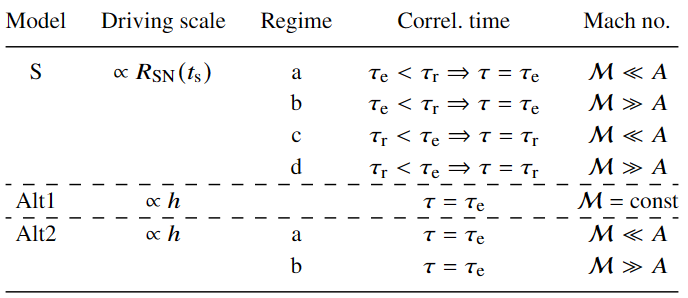


### Import dependencies

In [19]:
import numpy as np
from sympy import *
import pandas as pd

### Define Symbols involved
We need these symbols to substitute the physical constants' values into the final expressions.

In [20]:
# Symbols for the observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mu0 = Symbol('Mu_0')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')
alphak = Symbol('alpha_k')
Gamma = Symbol('Gamma')
eta = Symbol('eta')
Nsb = Symbol('N_sb')

### Choose the model

* The model_gen_regime() function from [model_generator.py](model_generator.py) takes in the regimes for the scale height h, correlation length l, velocity dispersion u, correlation time $\tau$ and $\alpha_k$ described in the manuscript. 
* This function is then used to find the expressions per regime chosen above

In [21]:
from regimes import hreg, lreg, ureg, taureg, alphareg 
from model_generator import model_gen_regime
quantities = model_gen_regime(hreg, lreg, ureg, taureg, alphareg)

### Constants involved

* We first import all the physical constants from [constants.in](constants.in). 
* Then, we make a list of tuples which will then be substituted in the expression.

**Note:** These constants will not matter while finding the scaling relations. However, if we want the full expressions, the physical constants play a significant role

In [22]:
# conversion factors and physical constants used to convert all quantities to cgs units for consistency
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8  # gravitational constant in cgs units
g_mH = 1.6736e-24  # mass of hydrogen atom in grams
cgs_kB = 1.3807e-16  # boltzmann constant in cgs units
pc_kpc = 1e3  # number of pc in one kpc
cm_kpc = 3.086e+21  # number of centimeters in one parsec
cm_km = 1e5  # number of cm in one km
s_Myr = 1e+6*(365*24*60*60)  # number of seconds in one megayear


# Reading the Constant values
gval, clval, xioval, mstarval, deltaval, e51val, kaval, Gammaval, Caval, Rkval, muval, mu0val, etaval = tuple(
    np.genfromtxt('constants.in', delimiter='=', dtype=np.float64)[:, -1])

# List of tuples for substituting the values in the symbol. 
# The firt element of each tuple is the symbol for which the value needs to be substituted
# The second element is the numerical value which is stored in constants.in file
const = [(boltz, cgs_kB), (mh, g_mH), (G, cgs_G), (gamma, gval),
         (calpha, Caval), (Rk, Rkval), (mu, muval), (cl,
                                               clval), (xio, xioval), (mstar, mstarval*g_Msun),
         (delta, deltaval), (E51, e51val), (kalpha, kaval), (Gamma, Gammaval), (mu0, mu0val), (eta, etaval), (C, 1)]

In [23]:
def scal_finder(quantities):
    quantity_string = ['h', 'l', 'u', 'tau',
                   'biso', 'bani', 'Bbar', 'tanpB']
    observable_string = [ 'q', 'omega', 'sigma','sigmatot', 'sigmasfr', 
                            'T']
    # observable to be varied
    observables = [ q, omega, sigma,sigmatot, sigmasfr, 
                    T]
    # if ks_bool: 
    #     observables.remove(sigma)
    #     observable_string.remove('sigma')
    # plotting the scaling relations
    exponents=[]
    for quan in quantities:
        power_observables = []
        for obs in observables:
            #We substitute 1 for each observable
            observable_subs = [(o, 1) for o in observables]
            #remove the observables we are interested in from the above list
            observable_subs.remove((obs, 1))
            values_substituted = const + observable_subs
            #substitute the rest of the quantities in the full expression along with the physical constants
            quan_obs_dependence = quan.subs(values_substituted)
            # exponent of the observable rounded off to three decimal places
            power_obs = np.round(np.float64((diff(log(quan_obs_dependence), obs)*obs).subs(obs, 1)), 3)
            #append exponent for this specific observable
            power_observables.append(power_obs)
        exponents.append(np.array(power_observables))
    df_exponents = pd.DataFrame(data=exponents, index = quantity_string, columns=observable_string)
    return df_exponents



In [24]:
df_exponents = scal_finder(quantities)
#df_exponents.to_csv('exponenents')
df_exponents 

,q,omega,sigma,sigmatot,sigmasfr,T
h,0.0,0.0,0.000,-1.000,0.000,1.000
l,0.0,0.0,-0.373,-0.373,0.000,0.206
u,0.0,0.0,-0.497,-0.163,0.333,0.275
tau,0.0,0.0,0.124,-0.209,-0.333,-0.069
biso,0.0,0.0,0.003,0.337,0.333,-0.225
bani,0.5,0.5,0.065,0.232,0.167,-0.260
Bbar,0.5,1.0,0.127,0.127,0.000,-0.294
tanpB,-1.0,-1.0,-0.869,1.464,0.333,-1.520


### Kennicut-Schmidt relations

* If you want to find scaling relations for the model assuming Kennicut-Schmidt relations to be true, the set ks_bool to be true

In [25]:
ks_bool = True
ks_exp = 1.4
C = Symbol('C')
df_exponents_ks = df_exponents.copy()
if ks_bool: 
    df_exponents_ks['sigmasfr'] += df_exponents_ks['sigma']/ks_exp
    df_exponents_ks.drop(['sigma'], axis=1, inplace = True)
#df_exponents_ks.to_csv('exponenents')
df_exponents_ks

,q,omega,sigmatot,sigmasfr,T
h,0.0,0.0,-1.000,0.000000,1.000
l,0.0,0.0,-0.373,-0.266429,0.206
u,0.0,0.0,-0.163,-0.022000,0.275
tau,0.0,0.0,-0.209,-0.244429,-0.069
biso,0.0,0.0,0.337,0.335143,-0.225
bani,0.5,0.5,0.232,0.213429,-0.260
Bbar,0.5,1.0,0.127,0.090714,-0.294
tanpB,-1.0,-1.0,1.464,-0.287714,-1.520
